In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-flipkart-laptop-under-70000/Flipkart laptops_info.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv("/kaggle/input/best-flipkart-laptop-under-70000/Flipkart laptops_info.csv",error_bad_lines = False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 116: expected 10 fields, saw 17\nSkipping line 117: expected 10 fields, saw 17\nSkipping line 141: expected 10 fields, saw 14\nSkipping line 145: expected 10 fields, saw 15\nSkipping line 168: expected 10 fields, saw 12\nSkipping line 195: expected 10 fields, saw 14\nSkipping line 250: expected 10 fields, saw 12\nSkipping line 279: expected 10 fields, saw 12\nSkipping line 311: expected 10 fields, saw 19\nSkipping line 455: expected 10 fields, saw 12\nSkipping line 467: expected 10 fields, saw 13\nSkipping line 470: expected 10 fields, saw 12\nSkipping line 516: expected 10 fields, saw 11\nSkipping line 520: expected 10 fields, saw 19\nSkipping line 583: expected 10 fields, saw 13\n'


In [4]:
df

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
0,Lenovo IdeaPad 3 Core i3 10th Gen,4.3,8,0,31990,53790,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5,4.4,11854,1199,52990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,Lenovo Intel Celeron Dual Core,4.1,366,35,28490,40490,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
...,...,...,...,...,...,...,...,...,...,...
676,Infinix INBook X2 Plus Core i3 11th Gen,4.1,146,32,40990,49990,Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
677,DELL Inspiron Ryzen 3 Dual Core 3250U,4.5,4,0,40790,50132,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
678,MSI Core i3 12th Gen,0.0,0,0,45490,58990,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
679,ASUS Core i3 10th Gen,4.7,12,0,33990,45499,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [5]:
df.head()

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
0,Lenovo IdeaPad 3 Core i3 10th Gen,4.3,8,0,31990,53790,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5,4.4,11854,1199,52990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,Lenovo Intel Celeron Dual Core,4.1,366,35,28490,40490,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [6]:
df.tail()

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
676,Infinix INBook X2 Plus Core i3 11th Gen,4.1,146,32,40990,49990,Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
677,DELL Inspiron Ryzen 3 Dual Core 3250U,4.5,4,0,40790,50132,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
678,MSI Core i3 12th Gen,0.0,0,0,45490,58990,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
679,ASUS Core i3 10th Gen,4.7,12,0,33990,45499,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
680,HP Pavilion Ryzen 5 Hexa Core 5625U,4.5,199,15,63990,72536,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductName    681 non-null    object 
 1   Stars          681 non-null    float64
 2   Ratings        681 non-null    int64  
 3   Reviews        681 non-null    int64  
 4   Current_Price  681 non-null    int64  
 5   MRP            681 non-null    int64  
 6   Proccessor     681 non-null    object 
 7   Ram            681 non-null    object 
 8   Storage        681 non-null    object 
 9   ImageURL       681 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 53.3+ KB


In [8]:
df.shape

(681, 10)

In [9]:
df.dtypes

ProductName       object
Stars            float64
Ratings            int64
Reviews            int64
Current_Price      int64
MRP                int64
Proccessor        object
Ram               object
Storage           object
ImageURL          object
dtype: object

In [10]:
#fillna values
df.fillna(0).iloc[:3]

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
0,Lenovo IdeaPad 3 Core i3 10th Gen,4.3,8,0,31990,53790,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


In [11]:
#distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Stars,681.0,3.393392,1.644590,0.0,3.7,4.2,4.3,5.0
Ratings,681.0,817.650514,1909.163189,0.0,8.0,78.0,505.0,17745.0
Reviews,681.0,102.396476,242.605686,0.0,0.0,10.0,61.0,2300.0
Current_Price,681.0,48240.491924,13941.846996,15990.0,37250.0,47990.0,59990.0,102000.0
MRP,681.0,62572.709251,19504.876499,0.0,50000.0,61590.0,76473.0,136990.0


<AxesSubplot:>

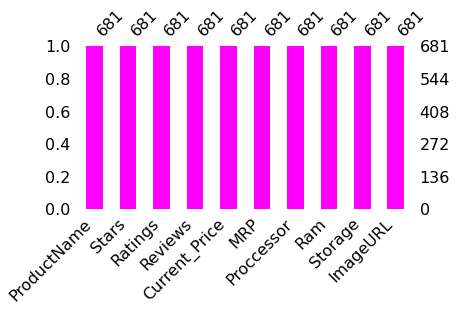

In [12]:
#visualize missing numbers in the dataset
msno.bar(df,figsize=(6,3),color='magenta')

In [13]:
df['ProductName'].groupby(df['ProductName']).count().sort_values(ascending=False)

ProductName
realme Book(Slim) Intel Evo Core i5 11th Gen    29
Lenovo IdeaPad 3 Core i3 10th Gen               29
DELL Inspiron Core i5 11th Gen                  16
Lenovo Ryzen 5 Hexa Core 5600H                  12
DELL Inspiron Core i3 11th Gen                  11
                                                ..
ASUS Vivobook 15 Touch Core i5 11th Gen          1
ASUS Vivobook 15 Touch Core i3 11th Gen          1
HP Ryzen 3 Dual Core 3rd Gen                     1
HP Ryzen 3 Hexa Core 4th Gen                     1
ASUS VivoBook 15 Ryzen 3 Dual Core AMD R3        1
Name: ProductName, Length: 342, dtype: int64

In [14]:
df['ProductName'].groupby(df['Ram']).count().sort_values(ascending=False)

Ram
8 GB DDR4 RAM                                            403
4 GB DDR4 RAM                                             97
16 GB DDR4 RAM                                            68
Microsoft Office 2019 Home & Student Included             29
8 GB LPDDR4X RAM                                          26
4 GB LPDDR4 RAM                                           11
16 GB LPDDR4X RAM                                          8
RAM & Storage: 8GB DDR4 & 512GB SSD                        7
4 GB LPDDR4X RAM                                           6
4 GB DDR3 RAM                                              4
8 GB DDR3 RAM                                              3
RAM & Storage: 8GB DDR4 & 1TB + 256GB SSD                  3
RAM & Storage: 8GB DDR4 & 256GB SSD                        2
AMD Ryzen 5 Hexa Core Processor                            2
RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 512GB SSD         2
Intel Core i7 Processor (7th Gen)                          1
Intel Core i5 Proces

In [15]:
df.keys()

Index(['ProductName', 'Stars', 'Ratings', 'Reviews', 'Current_Price', 'MRP',
       'Proccessor', 'Ram', 'Storage', 'ImageURL'],
      dtype='object')

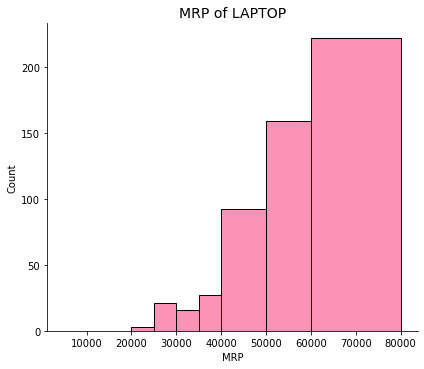

In [16]:
sns.displot(df, x= 'MRP',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e')
plt.title("MRP of LAPTOP",fontsize = 14)
plt.show()

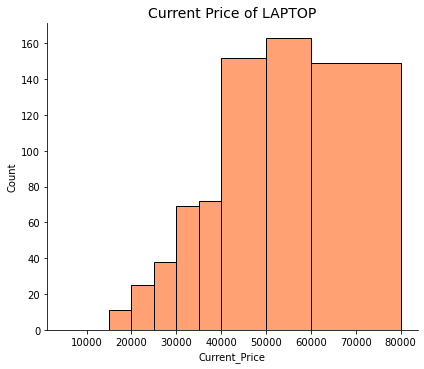

In [17]:
sns.displot(df, x='Current_Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#ff8243')
plt.title("Current Price of LAPTOP",fontsize = 14)
plt.show()

# Find the pr**oduct having highest ratings?**

In [18]:
df[df['Ratings']==max(df['Ratings'])]

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
637,ASUS Celeron Dual Core,3.7,17745,2300,22990,30990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...


In [19]:
df.sort_values(by='Ratings',ascending = False).head()

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
637,ASUS Celeron Dual Core,3.7,17745,2300,22990,30990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5,4.4,11854,1199,52990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
226,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,35990,50990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
382,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...


In [20]:
top5 = df.sort_values(by='Ratings',ascending = False).head()

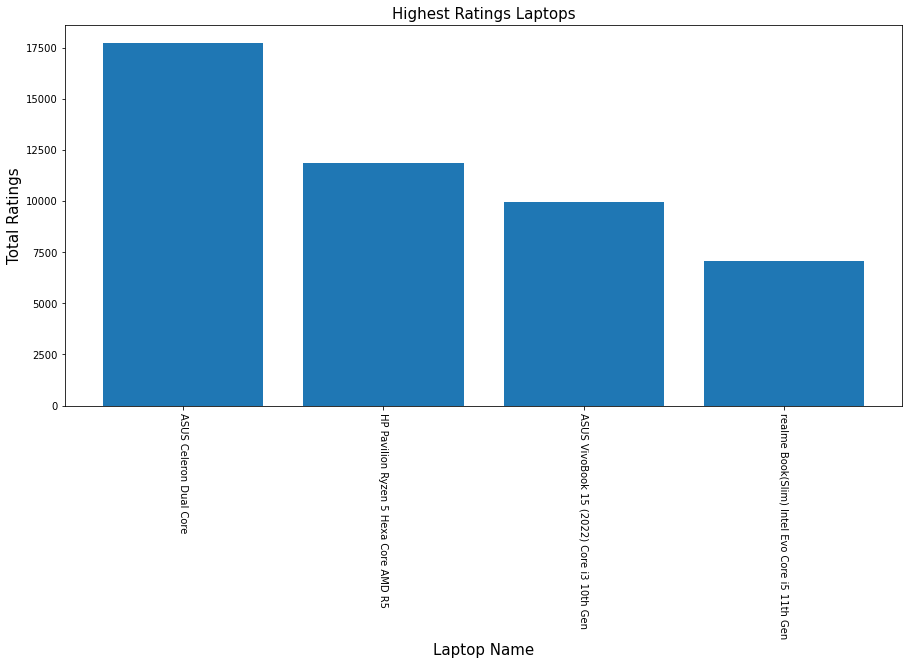

In [21]:
plt.figure(figsize=(15,7))
plt.bar(x=top5['ProductName'],height=top5['Ratings'])
plt.title('Highest Ratings Laptops',fontsize=15)
plt.xlabel('Laptop Name',fontsize=15)
plt.ylabel('Total Ratings',fontsize=15)
plt.xticks(rotation = 270)
#plt.savefig('My Chart.jpg')
plt.show()


# **Most Affordable Laptops ?**

In [22]:
top5 = df.sort_values(by='Current_Price',ascending = True).head()

In [23]:
top5

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
109,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1741,274,15990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
269,Avita SATUS S111 Celeron Dual Core,3.9,646,89,16990,29990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
589,Avita PURA APU Dual Core A6,3.7,1597,228,17990,27990,AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
643,Avita PURA APU Dual Core A6,3.7,1597,228,18490,27990,AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
496,Lenovo Athlon Dual Core 3050U,0.0,0,0,18990,36000,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/x...


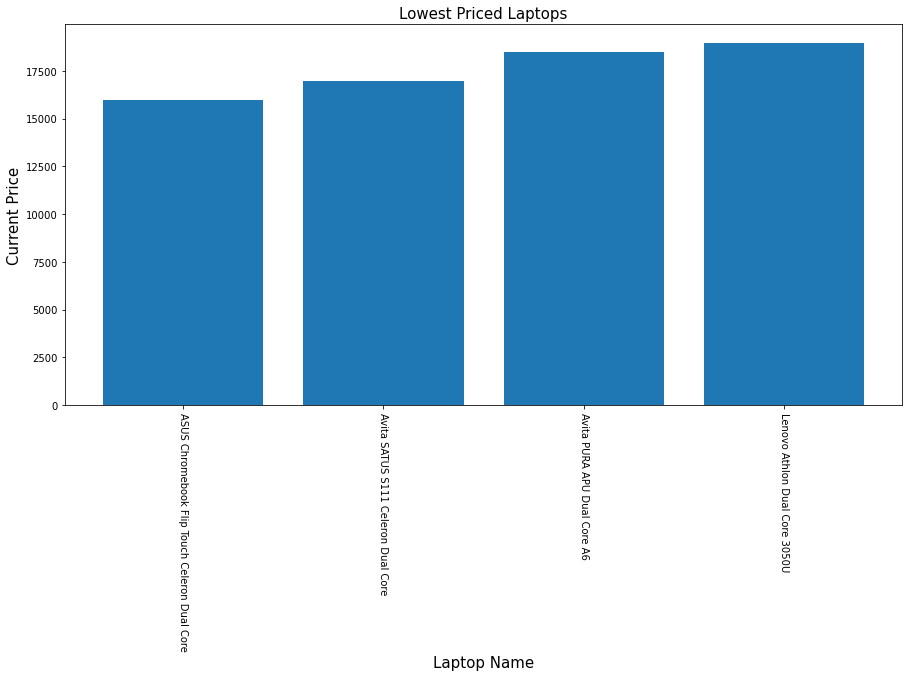

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=top5['ProductName'],height=top5['Current_Price'])
plt.title('Lowest Priced Laptops',fontsize=15)
plt.xlabel('Laptop Name',fontsize=15)
plt.ylabel('Current Price',fontsize=15)
plt.xticks(rotation = 270)
#plt.savefig('Lowset Price Laptop.jpg')
plt.show()


# **Top 10 Most Affordable Laptops**

In [25]:
top10 = df.sort_values(by='Current_Price',ascending = True).head(10)

In [26]:
top10

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
109,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1741,274,15990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/x...
269,Avita SATUS S111 Celeron Dual Core,3.9,646,89,16990,29990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
589,Avita PURA APU Dual Core A6,3.7,1597,228,17990,27990,AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
643,Avita PURA APU Dual Core A6,3.7,1597,228,18490,27990,AMD APU Dual Core A6 Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
496,Lenovo Athlon Dual Core 3050U,0.0,0,0,18990,36000,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/x...
384,Lenovo Athlon Dual Core 3050U,4.0,8,2,18990,29999,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
477,ASUS Chromebook Celeron Dual Core,3.6,385,50,18990,22990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/k...
532,AXL Celeron Dual Core,0.0,0,0,18990,31990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
510,Lenovo Athlon Dual Core 3050U,0.0,0,0,18990,29999,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/x...
591,Lenovo IdeaPad 3 Chromebook Celeron Dual Core,3.5,1369,162,19990,24840,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display,https://rukminim1.flixcart.com/image/312/312/k...


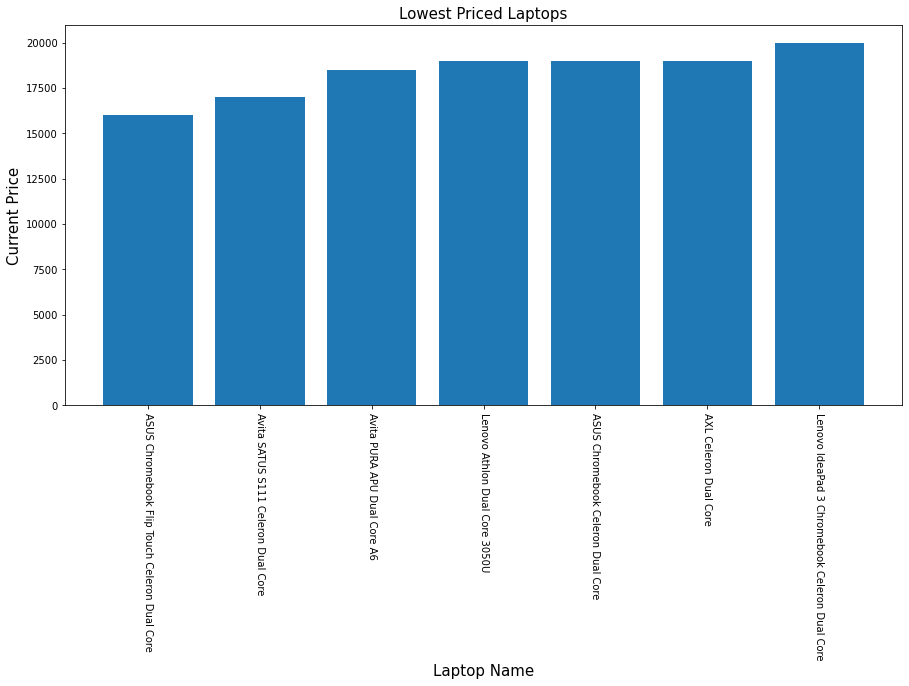

In [27]:
plt.figure(figsize=(15,7))
plt.bar(x=top10['ProductName'],height=top10['Current_Price'])
plt.title('Lowest Priced Laptops',fontsize=15)
plt.xlabel('Laptop Name',fontsize=15)
plt.ylabel('Current Price',fontsize=15)
plt.xticks(rotation = 270)
#plt.savefig('Lowset Price Laptop.jpg')
plt.show()

# **Mid-Range Laptops**

In [28]:
midrange_laptops = df[(df['Current_Price']<45000)& (df['Current_Price']>35000)]

In [29]:
midrange_laptops

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
7,HP 14s Intel Core i3 11th Gen,4.2,1556,137,35990,47206,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
9,RedmiBook Pro Core i5 11th Gen,4.1,3641,430,39990,59999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
15,DELL Vostro Core i3 11th Gen,4.2,35,1,42290,58489,Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,"Display: 15.6"" FHD WVA AG Narrow Border",https://rukminim1.flixcart.com/image/312/312/x...
16,HP 15s Intel Core i3 11th Gen,4.2,328,35,40990,50585,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
17,ASUS Vivobook 15 Touch Core i3 11th Gen,4.3,317,42,41990,60990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
...,...,...,...,...,...,...,...,...,...,...
656,DELL Ryzen 3 Dual Core 3250U,3.5,17,3,39990,53640,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
657,DELL Core i3 10th Gen,3.3,122,20,41990,54992,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...
659,DELL Ryzen 3 Dual Core 3250U,3.5,17,3,39990,53640,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
676,Infinix INBook X2 Plus Core i3 11th Gen,4.1,146,32,40990,49990,Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


# **Find the Product Highest Reviwes**

In [30]:
df[df['Reviews']==max(df['Reviews'])]

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
637,ASUS Celeron Dual Core,3.7,17745,2300,22990,30990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...


In [31]:
top10 = df.sort_values(by='Reviews',ascending = False).head(10)

In [32]:
top10

,ProductName,Stars,Ratings,Reviews,Current_Price,MRP,Proccessor,Ram,Storage,ImageURL
637,ASUS Celeron Dual Core,3.7,17745,2300,22990,30990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5,4.4,11854,1199,52990,63539,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
226,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,35990,50990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9970,999,32990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
592,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
664,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
310,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
55,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
217,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...
147,realme Book(Slim) Intel Evo Core i5 11th Gen,4.4,7067,949,59990,69999,Powered by 11th Gen Intel Evo Core i5 Processor,Microsoft Office 2019 Home & Student Included,Intel Core i5 Processor (11th Gen),https://rukminim1.flixcart.com/image/312/312/k...


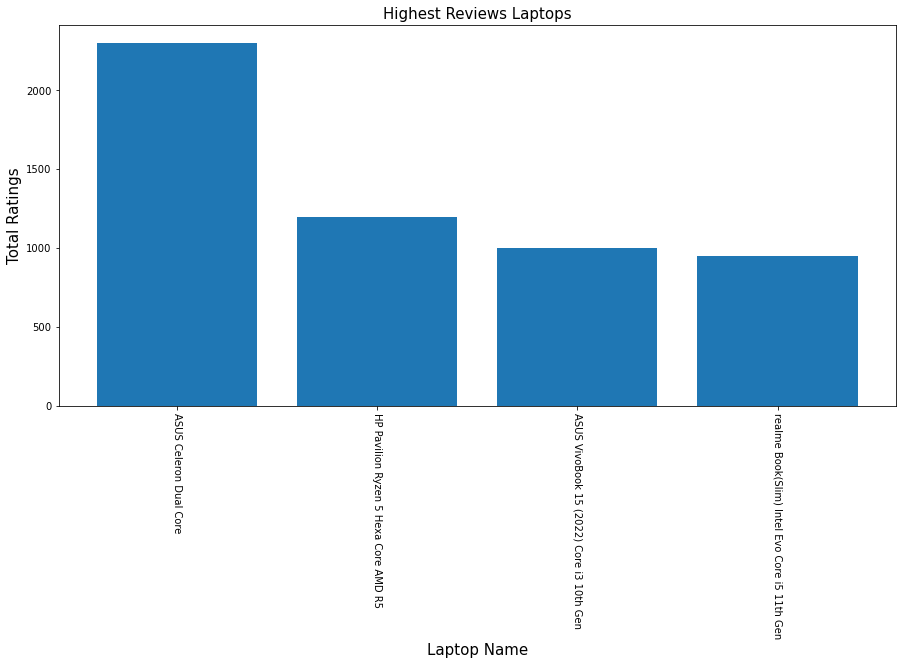

In [33]:
plt.figure(figsize=(15,7))
plt.bar(x=top10['ProductName'],height=top10['Reviews'])
plt.title('Highest Reviews Laptops',fontsize=15)
plt.xlabel('Laptop Name',fontsize=15)
plt.ylabel('Total Ratings',fontsize=15)
plt.xticks(rotation = 270)
#plt.savefig('My Chart.jpg')
plt.show()
